# Intro to pandas

**Pandas:**
  * Gain an introduction to the `DataFrame` and `Series` data structures of the *pandas* library
  * Access and manipulate data within a `DataFrame` and `Series`
  * Import CSV data into a *pandas* `DataFrame`

[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API (Application Programming Interface). It's a great tool for handling and analyzing input data, and many ML frameworks support *pandas* data structures as inputs.
Although a comprehensive introduction to the *pandas* API would span many pages, the core concepts are fairly straightforward, and we'll present them below. For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

## Basic Concepts

For more complete information including tutorials, please, refer to https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html

The following line imports the *pandas*

In [2]:
import pandas as pd

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation.

One way to create a `Series` is to construct a `Series` object. For example:

In [3]:
a_values = pd.Series([1, 2, 3])

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [4]:
b_values = pd.Series([4, 5, 6])
# test Data Frame
test = pd.DataFrame({ 'a': a_values, 'b': b_values })

In [5]:
test.keys()

Index(['a', 'b'], dtype='object')

In [6]:
test.head()

,a,b
0,1,4
1,2,5
2,3,6


In [7]:
test.describe()

,a,b
count,3.0,3.0
mean,2.0,5.0
std,1.0,1.0
min,1.0,4.0
25%,1.5,4.5
50%,2.0,5.0
75%,2.5,5.5
max,3.0,6.0


In [8]:
test.query("a>2 and b>a")

,a,b
2,3,6


In [10]:
import numpy as np

#let us take a log of test.a
np.log(test.a)
#equivalently
print(type(np.log(test['a'])))
np.log(test['a'])

<class 'pandas.core.series.Series'>


,a
0,0.000000
1,0.693147
2,1.098612


In [13]:
test['c'] = test.a + test.b

In [15]:
test

,a,b,c
0,1,4,5
1,2,5,7
2,3,6,9


But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

In [16]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The example above used `DataFrame.describe` to show interesting statistics about a `DataFrame`. Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

In [17]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

array([[<Axes: title={'center': 'housing_median_age'}>]], dtype=object)

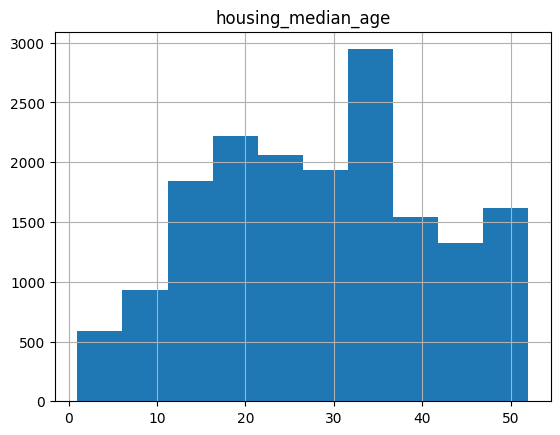

In [18]:
california_housing_dataframe.hist('housing_median_age')

array([[<Axes: title={'center': 'population'}>]], dtype=object)

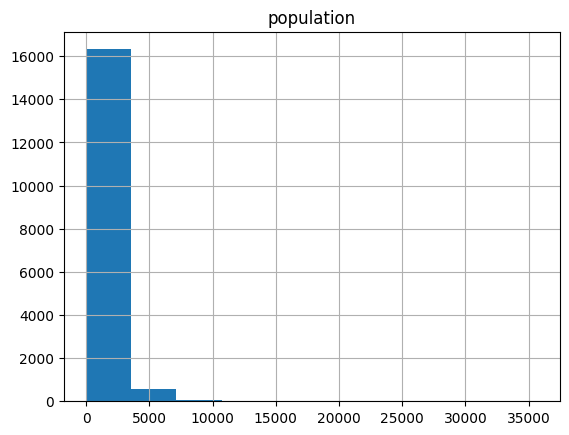

In [19]:
california_housing_dataframe.hist('population')

In [20]:
california_housing_dataframe.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [21]:
len(california_housing_dataframe.query("population > 10000"))

19